In [7]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
#warnings
import warnings
warnings.filterwarnings("ignore")

In [9]:
#Mounting Google Drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
#Importing Data
data=pd.read_csv("/content/drive/MyDrive/creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [11]:
data["Class"].value_counts

<bound method IndexOpsMixin.value_counts of 0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64>

In [12]:
#Null Values
data.isnull().sum().sum()

0

In [13]:
#Duplicates
data.duplicated().sum()

1081

In [14]:
data.drop_duplicates()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

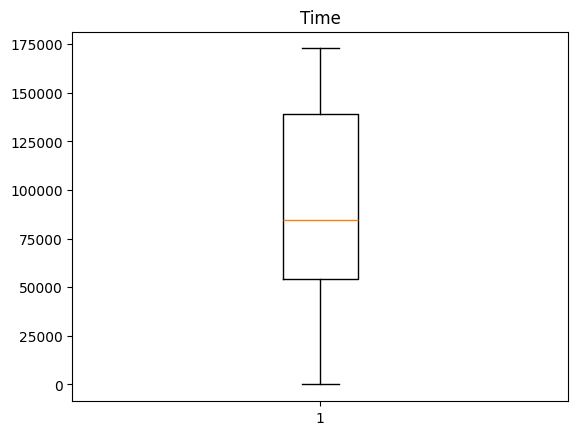

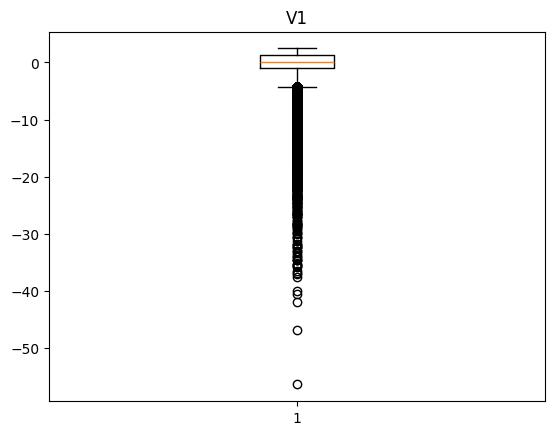

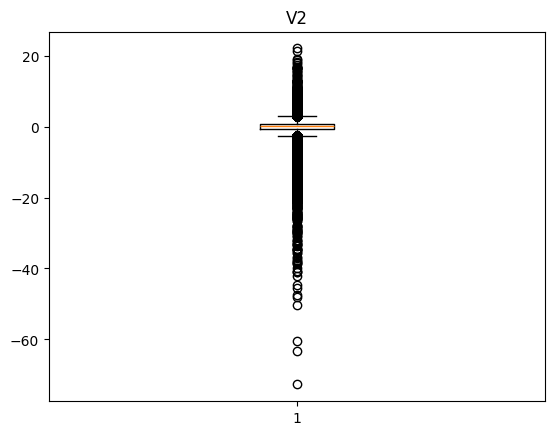

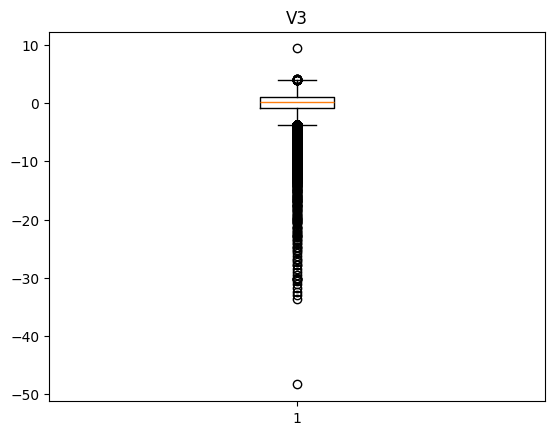

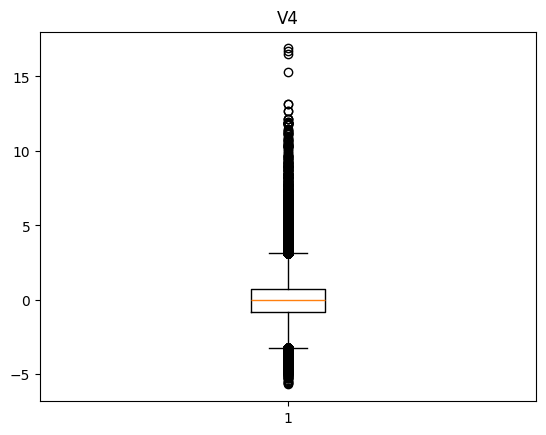

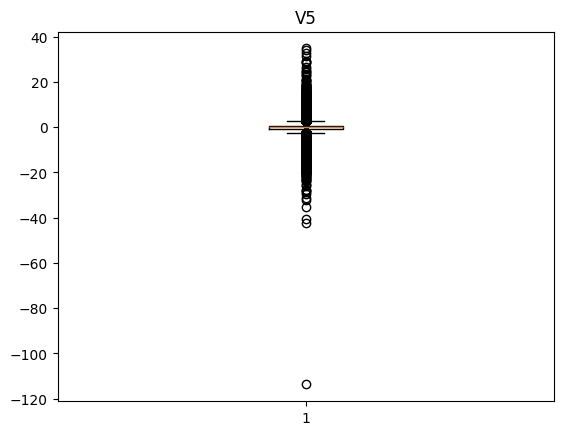

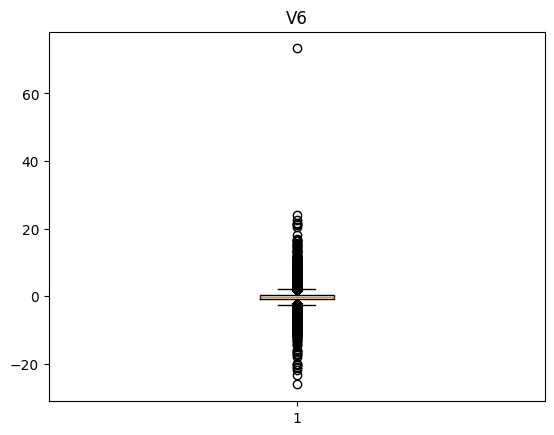

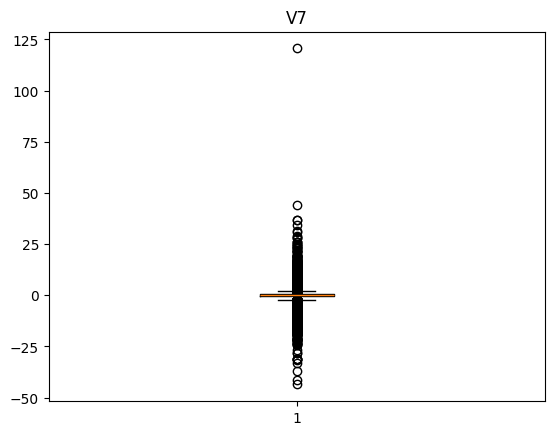

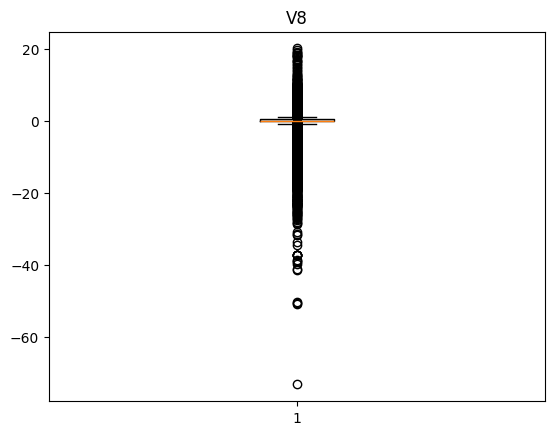

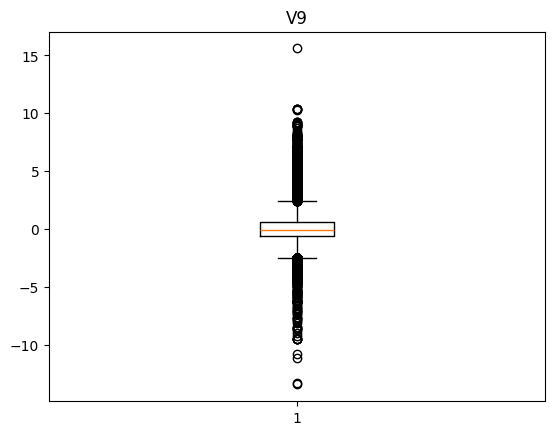

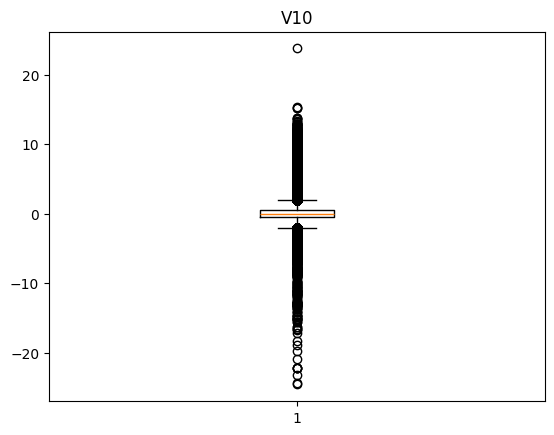

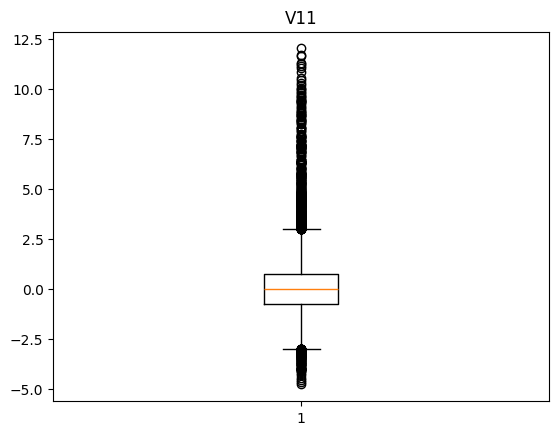

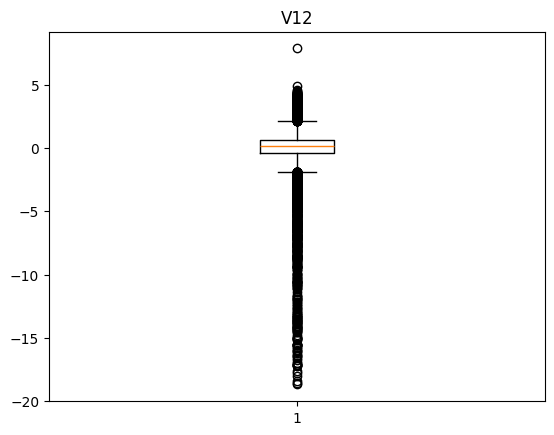

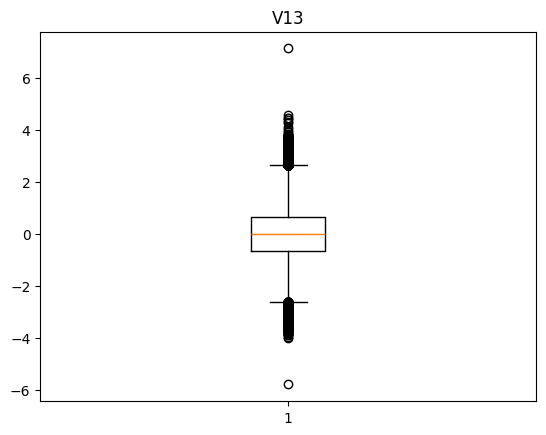

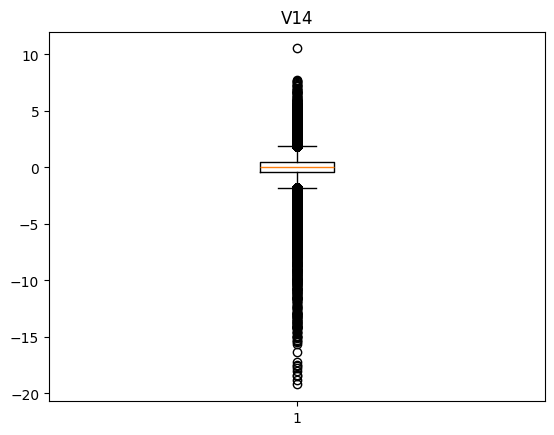

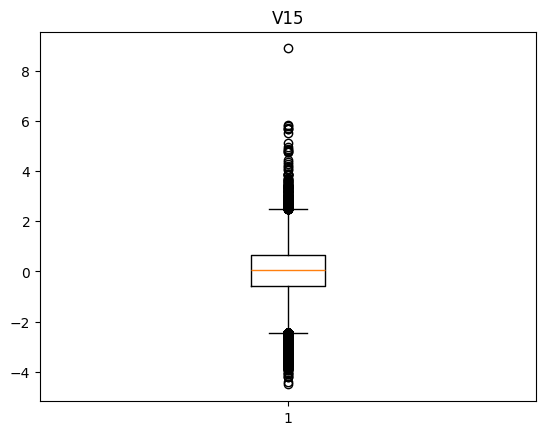

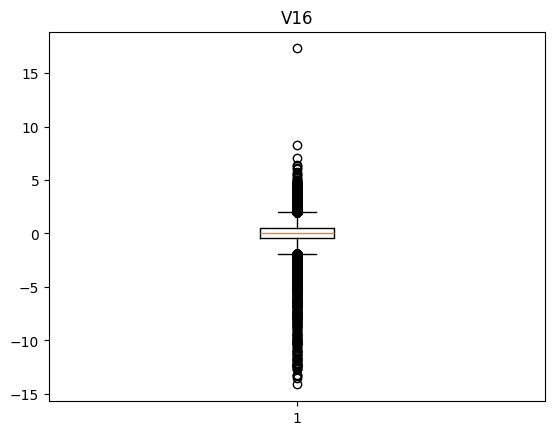

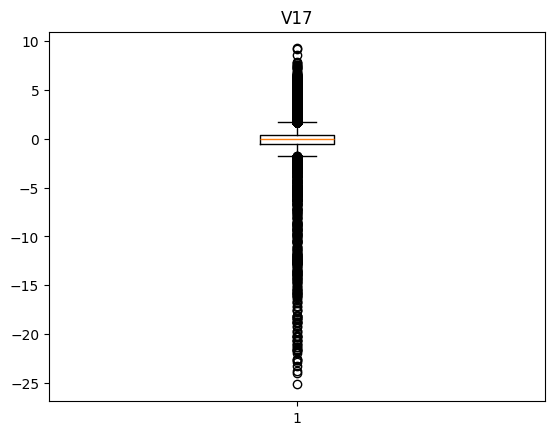

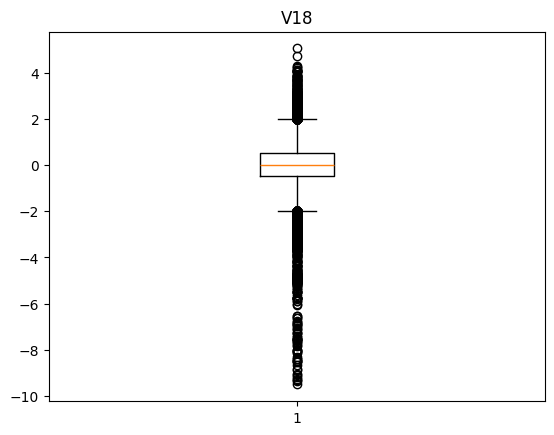

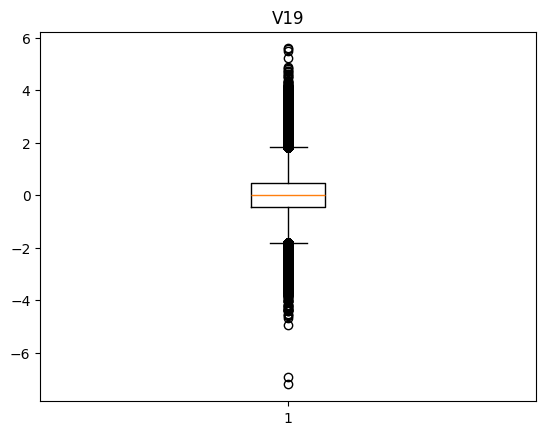

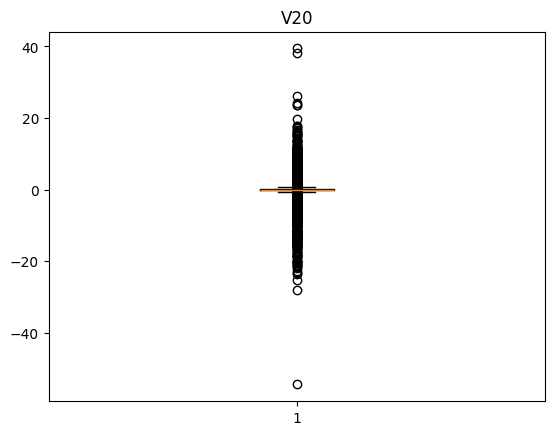

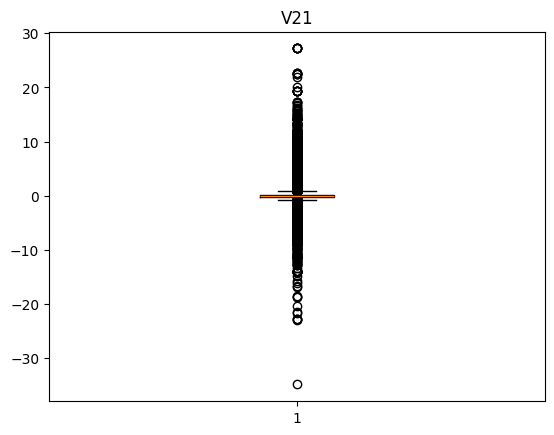

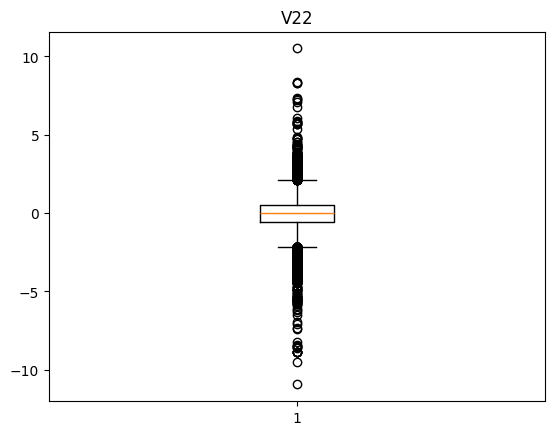

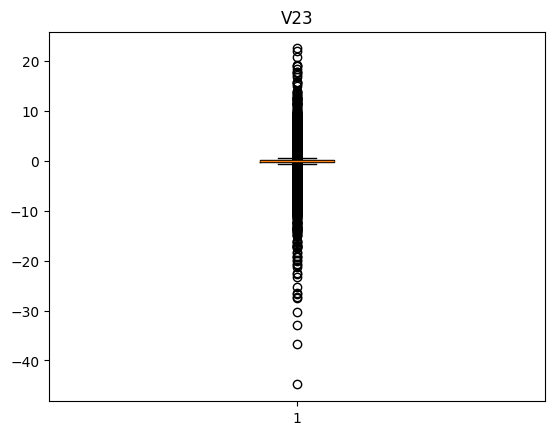

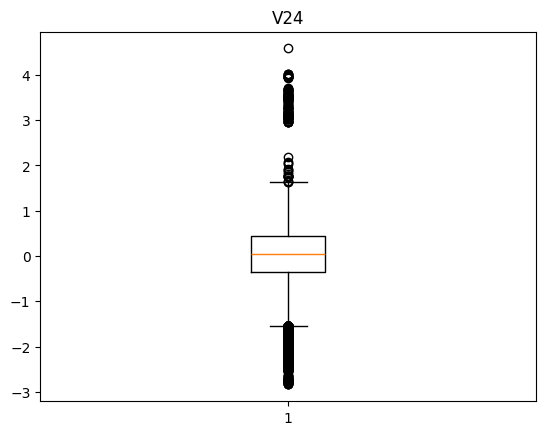

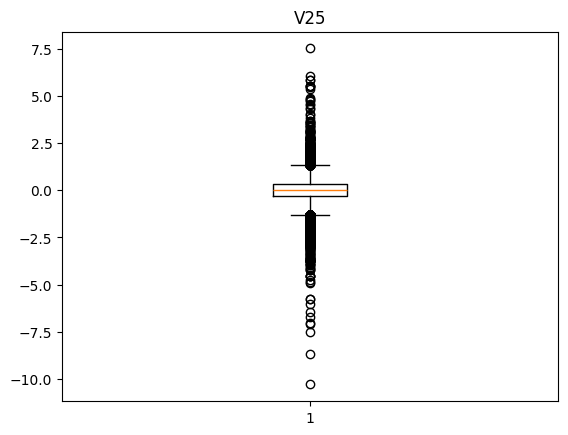

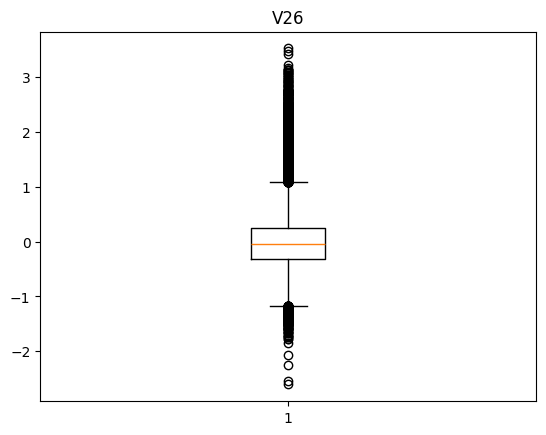

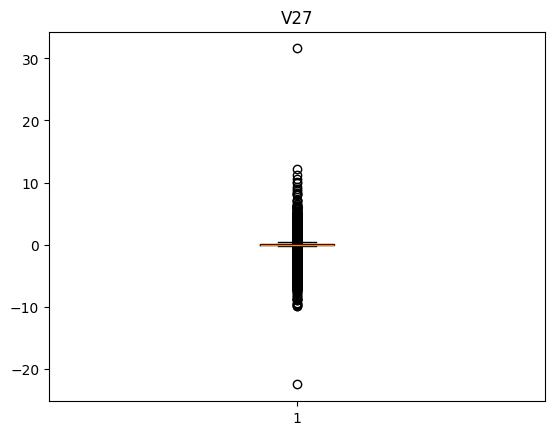

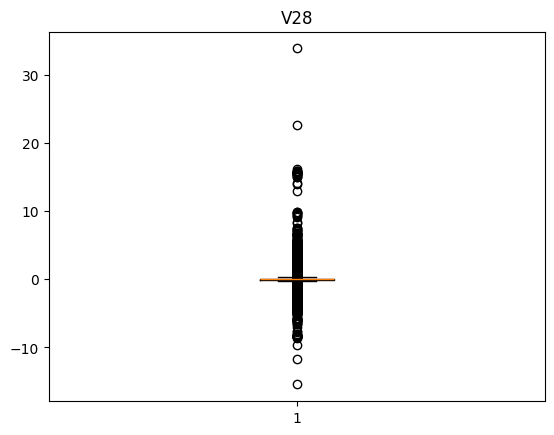

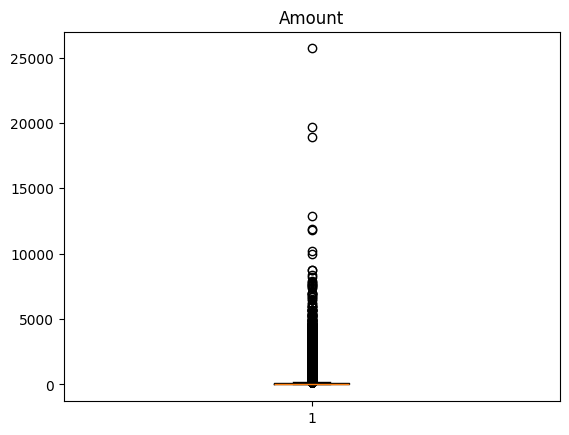

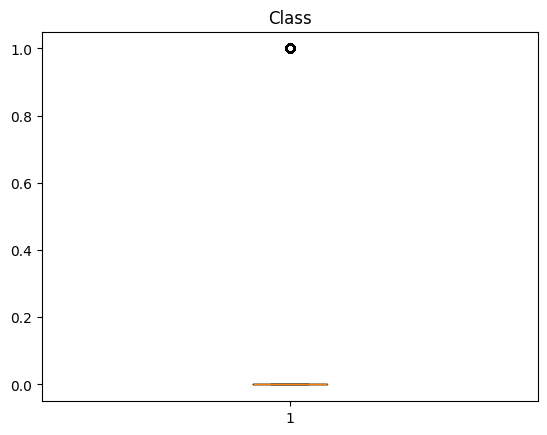

In [16]:
#Outliers
for col in data.columns:
    if data[col].dtype!="object":
        plt.boxplot(data[col])
        plt.title(col)
        plt.show()

In [17]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [18]:
#selecting features having outliers
out_cols=[ 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

In [19]:
for col in out_cols:
    q1=data[col].quantile(0.25)
    q3=data[col].quantile(0.75)
    IQR=q3-q1
    UL=q3+1.5*IQR
    LL=q1-1.5*IQR
    data=data[(data[col]>=LL)&(data[col]<=UL)]


In [20]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0
12,10.0,1.249999,-1.221637,0.383930,-1.234899,-1.485419,-0.753230,-0.689405,-0.227487,-2.094011,...,-0.231809,-0.483285,0.084668,0.392831,0.161135,-0.354990,0.026416,0.042422,121.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284794,172777.0,-1.266580,-0.400461,0.956221,-0.723919,1.531993,-1.788600,0.314741,0.004704,0.013857,...,-0.157831,-0.883365,0.088485,-0.076790,-0.095833,0.132720,-0.028468,0.126494,0.89,0
284796,172780.0,1.884849,-0.143540,-0.999943,1.506772,-0.035300,-0.613638,0.190241,-0.249058,0.666458,...,0.144008,0.634646,-0.042114,-0.053206,0.316403,-0.461441,0.018265,-0.041068,60.00,0
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0


<Axes: >

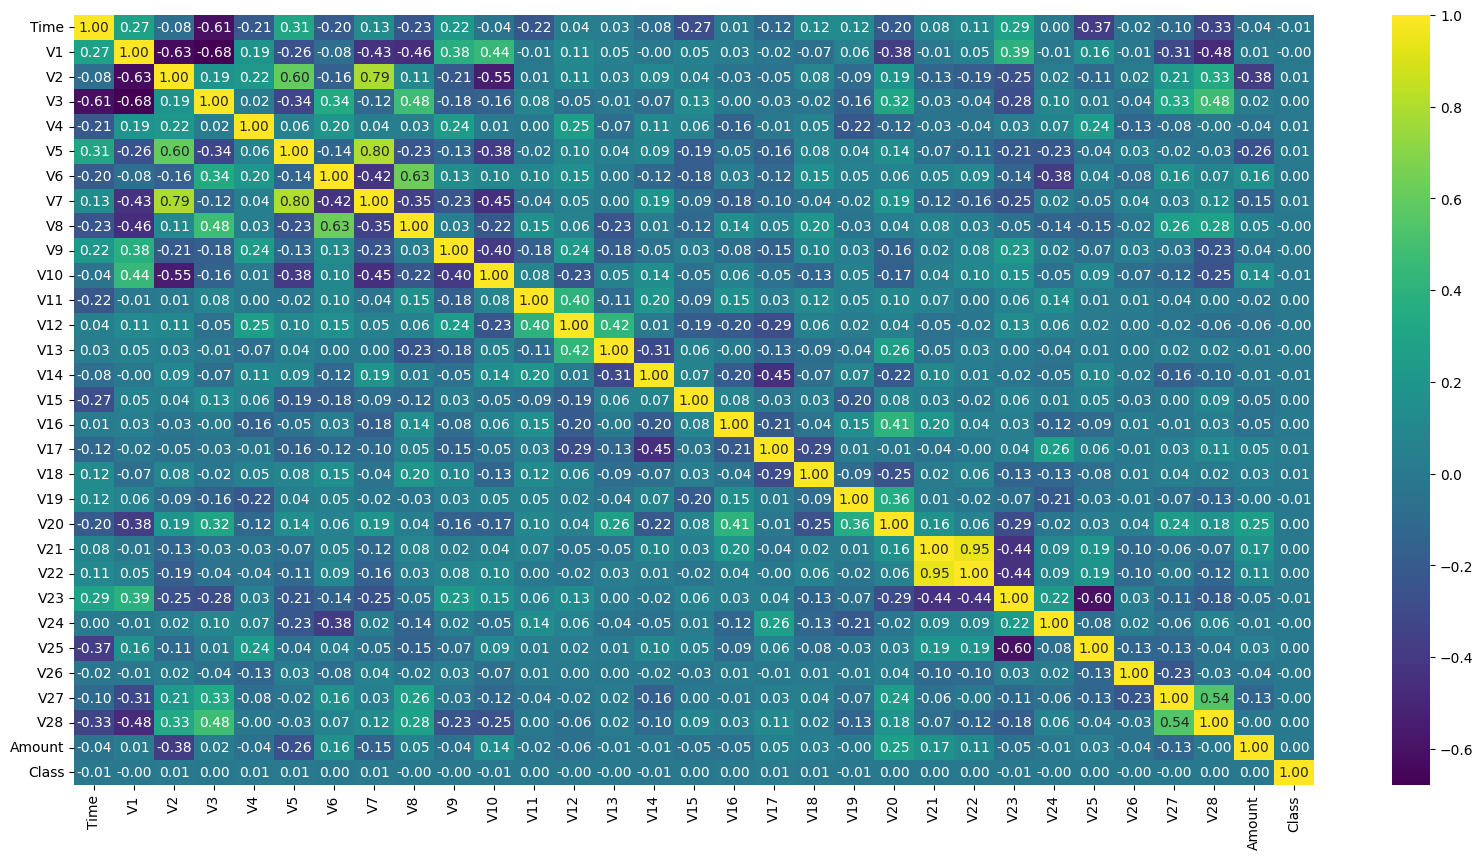

In [21]:
#Heatmap
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,cmap="viridis",fmt=".2f")

In [22]:
x=data.drop(["Class"],axis=1)
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68
12,10.0,1.249999,-1.221637,0.383930,-1.234899,-1.485419,-0.753230,-0.689405,-0.227487,-2.094011,...,-0.102756,-0.231809,-0.483285,0.084668,0.392831,0.161135,-0.354990,0.026416,0.042422,121.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284794,172777.0,-1.266580,-0.400461,0.956221,-0.723919,1.531993,-1.788600,0.314741,0.004704,0.013857,...,-0.029539,-0.157831,-0.883365,0.088485,-0.076790,-0.095833,0.132720,-0.028468,0.126494,0.89
284796,172780.0,1.884849,-0.143540,-0.999943,1.506772,-0.035300,-0.613638,0.190241,-0.249058,0.666458,...,-0.153997,0.144008,0.634646,-0.042114,-0.053206,0.316403,-0.461441,0.018265,-0.041068,60.00
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.139512,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.256922,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68


In [23]:
#VIF-Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [24]:
vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["Muticolinearity_value"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,features,Muticolinearity_value
0,Time,16.392349
1,V1,622.909996
2,V2,753.137350
3,V3,2357.967737
4,V4,610.227754
5,V5,323.761807
6,V6,153.465173
7,V7,3229.122693
8,V8,504.442498
9,V9,729.919444


In [25]:
x.drop("V17",axis=1,inplace=True)

In [26]:
vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["Muticolinearity_value"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,features,Muticolinearity_value
0,Time,16.392334
1,V1,95.436124
2,V2,333.516719
3,V3,35.486954
4,V4,6.004397
5,V5,23.068039
6,V6,55.582095
7,V7,1194.044997
8,V8,499.906419
9,V9,151.927154


In [27]:
x.drop("V7",axis=1,inplace=True)

In [28]:
vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["Muticolinearity_value"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,features,Muticolinearity_value
0,Time,15.745281
1,V1,33.440965
2,V2,10.385133
3,V3,9.713138
4,V4,5.790371
5,V5,11.914093
6,V6,8.933747
7,V8,8.623117
8,V9,9.885458
9,V10,12.897384


In [29]:
x.drop("V21",axis=1,inplace=True)

In [30]:
vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["Muticolinearity_value"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,features,Muticolinearity_value
0,Time,15.006001
1,V1,28.039328
2,V2,8.355642
3,V3,6.954057
4,V4,4.735686
5,V5,10.269448
6,V6,7.704765
7,V8,7.330797
8,V9,7.450290
9,V10,9.287486


In [31]:
x.drop("V1",axis=1,inplace=True)

In [32]:
vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["Muticolinearity_value"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,features,Muticolinearity_value
0,Time,10.519000
1,V2,6.424101
2,V3,4.103474
3,V4,3.102891
4,V5,9.142063
5,V6,7.207892
6,V8,5.533967
7,V9,7.303282
8,V10,9.287480
9,V11,2.596712


In [33]:
x.drop("Time",axis=1,inplace=True)

In [34]:
vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["Muticolinearity_value"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,features,Muticolinearity_value
0,V2,6.292494
1,V3,3.525005
2,V4,2.941711
3,V5,5.715257
4,V6,5.784802
5,V8,5.099674
6,V9,6.445684
7,V10,8.132493
8,V11,2.552791
9,V12,3.979436


In [35]:
x.drop("V2",axis=1,inplace=True)

In [36]:
vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["Muticolinearity_value"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,features,Muticolinearity_value
0,V3,3.523936
1,V4,1.842698
2,V5,5.412409
3,V6,5.517897
4,V8,5.024972
5,V9,5.554669
6,V10,6.757138
7,V11,2.545987
8,V12,3.959929
9,V13,3.155819


In [37]:
x.drop("V10",axis=1,inplace=True)

In [38]:

vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["Muticolinearity_value"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,features,Muticolinearity_value
0,V3,3.322942
1,V4,1.623951
2,V5,3.018924
3,V6,3.467454
4,V8,2.761670
5,V9,2.197202
6,V11,2.519152
7,V12,3.949890
8,V13,3.100052
9,V14,1.464716


In [39]:
x.drop("V23",axis=1,inplace=True)

In [40]:

vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["Muticolinearity_value"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,features,Muticolinearity_value
0,V3,2.357481
1,V4,1.557595
2,V5,2.362707
3,V6,3.447982
4,V8,2.755865
5,V9,2.145039
6,V11,2.454037
7,V12,3.934192
8,V13,3.071389
9,V14,1.463524


We can see that Muticolinearity_value of all the features are under 5. We can go ahead and start training and testing the data.

In [41]:
y=data["Class"]
y

,Class
1,0
5,0
6,0
9,0
12,0
...,...
284794,0
284796,0
284797,0
284800,0


In [42]:
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [43]:
#Model Building

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
model=LogisticRegression()

In [46]:
model.fit(x_train,y_train)

LogisticRegression()

In [47]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [48]:
print(len(y_test))
print(len(y_pred))


33037
33037


In [49]:
#Confusion Matrix
from sklearn.metrics import accuracy_score,confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[33035,     0],
       [    2,     0]])

In [50]:
#Accuracy Score
np.round(accuracy_score(y_test,y_pred),2)

1.0

<Axes: >

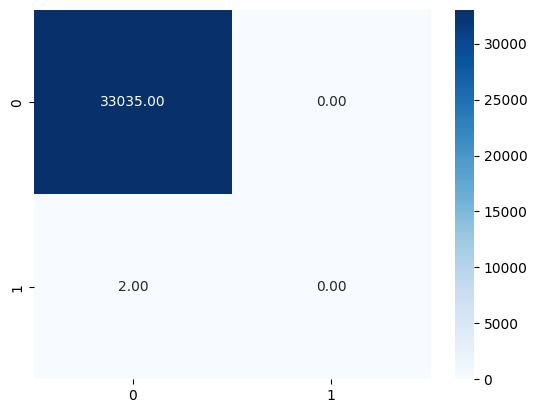

In [51]:
sns.heatmap(cm,cmap="Blues",annot=True,fmt=".2f")